In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:

df = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/6_SeveralNum.csv"
data = pd.read_csv(df, header=0, index_col=0)
data.head(6)

data = pd.DataFrame(data, columns=['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt'])
data_melt = pd.melt(data)

Check distribution

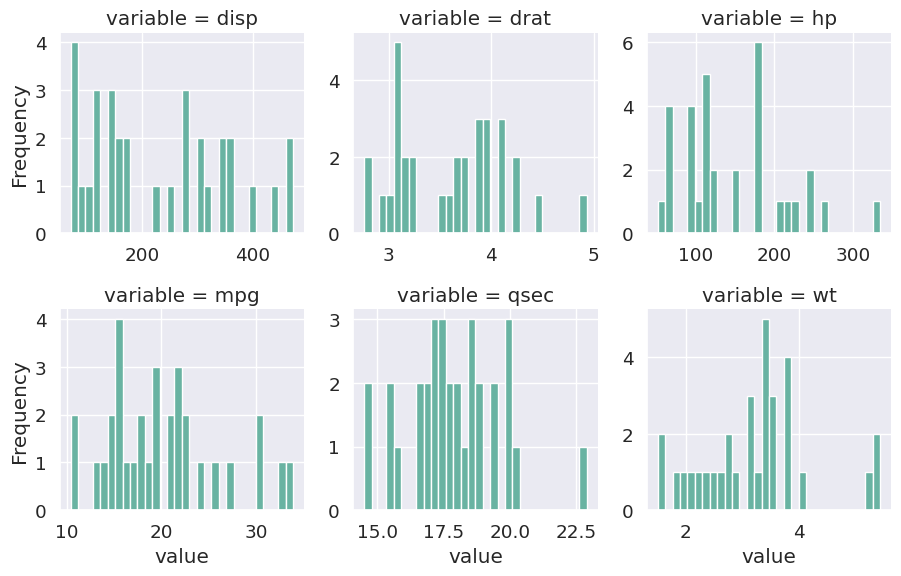

In [7]:
g = sns.FacetGrid(data_melt, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(plt.hist, 'value', color='#69b3a2', bins=30)
g.set_xlabels('value')
g.set_ylabels('Frequency')
plt.show()

Correlogram

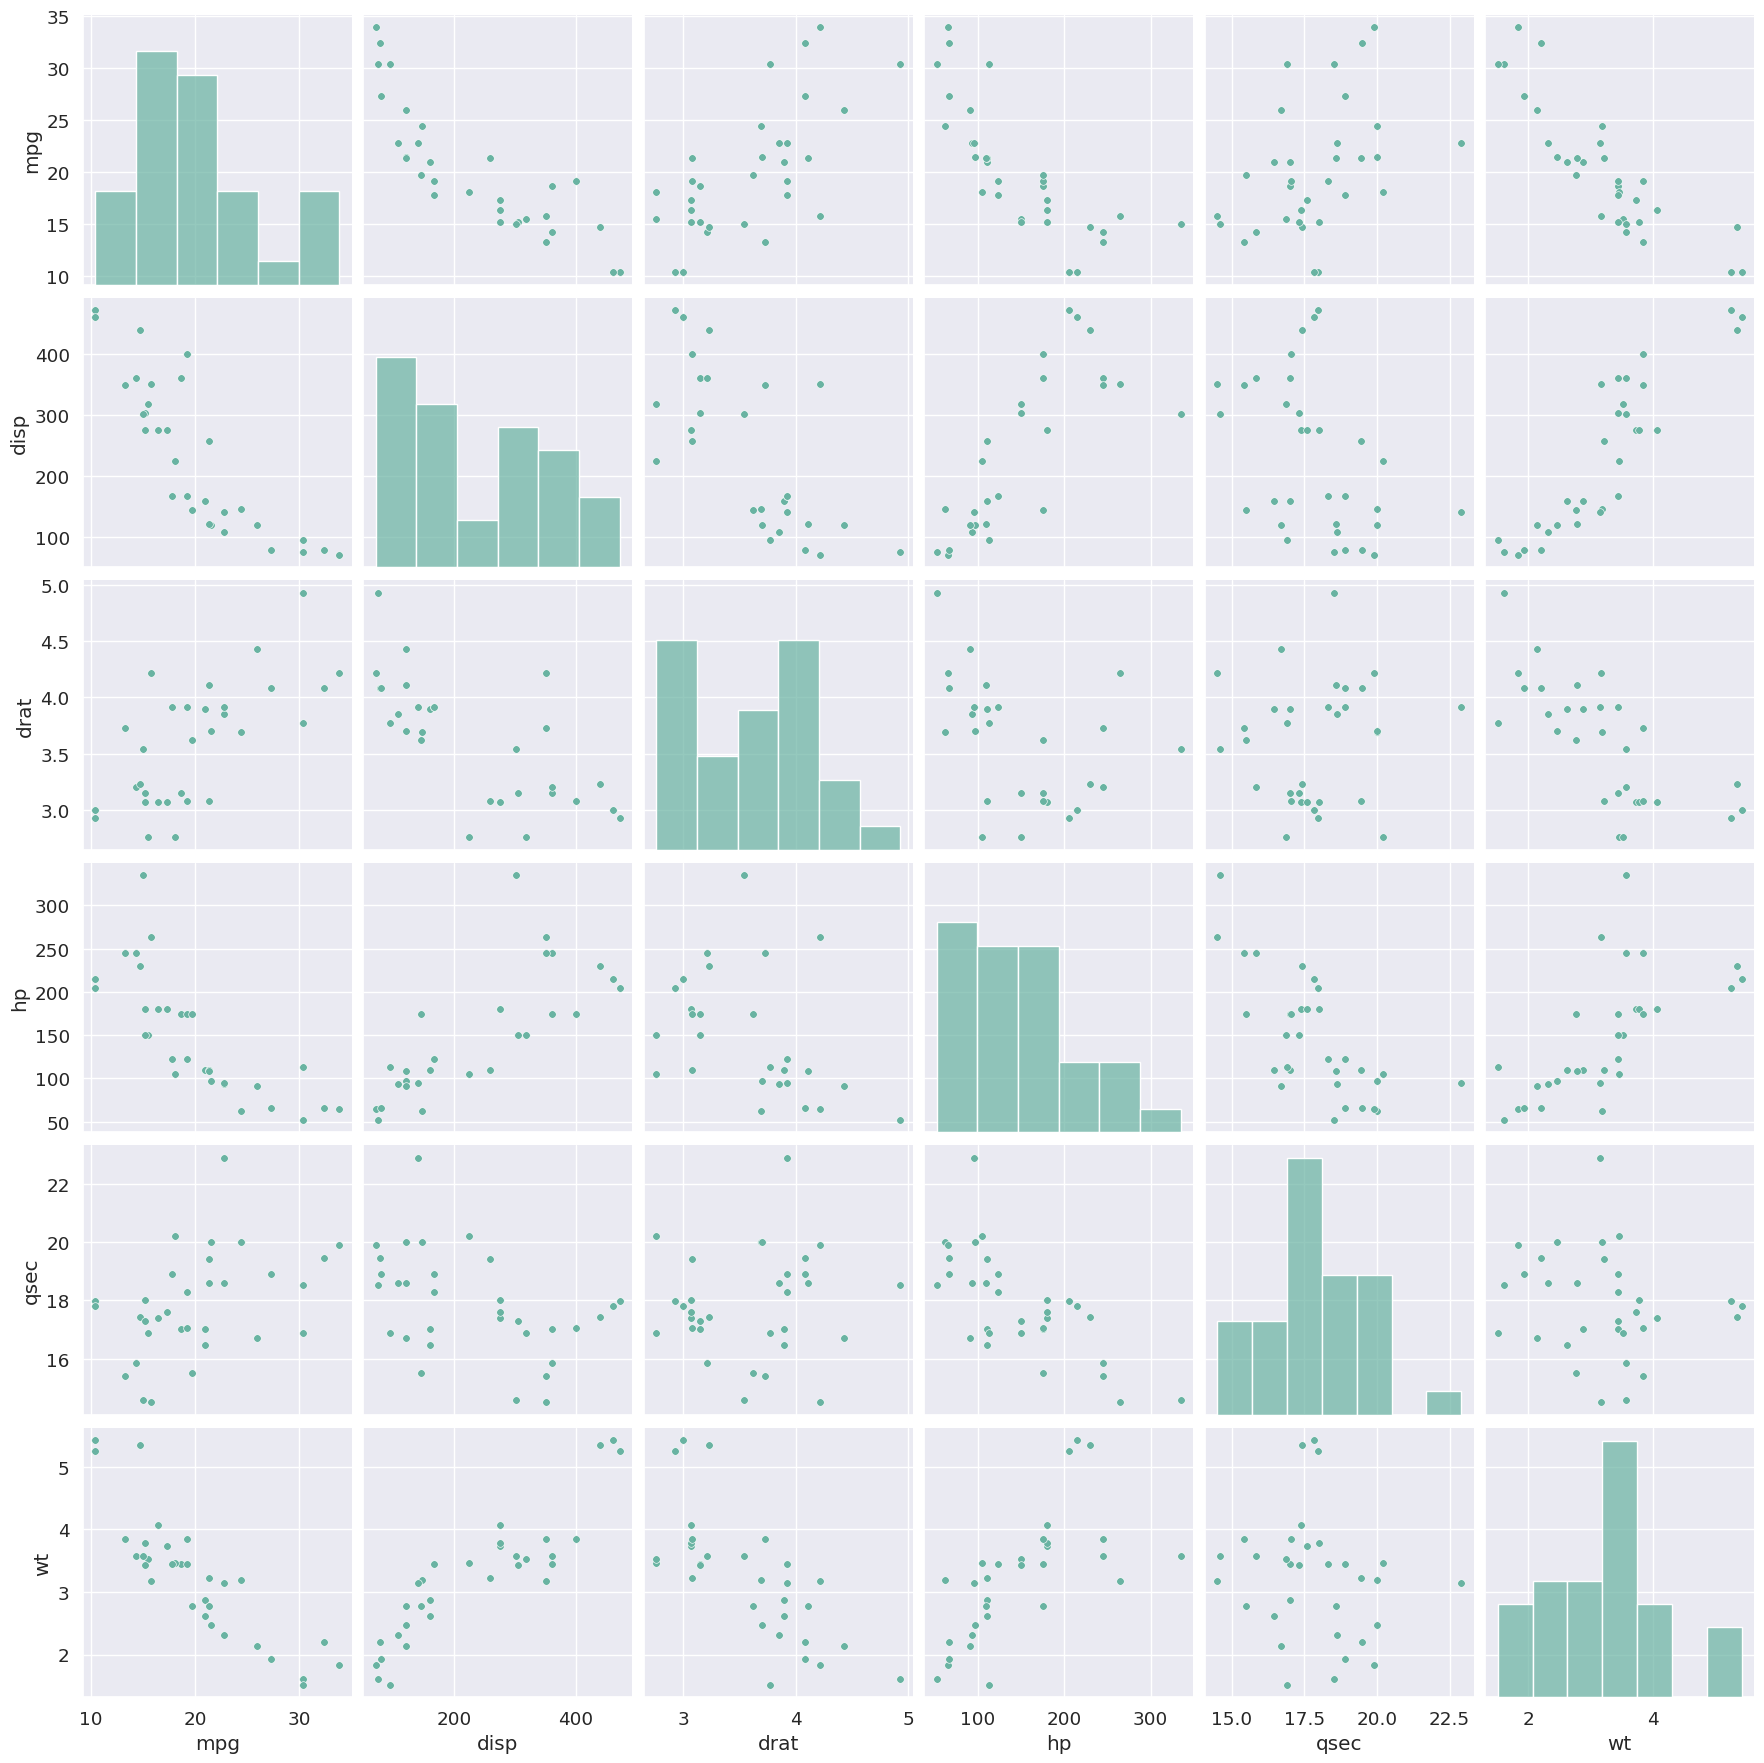

In [10]:
sns.pairplot(data=data.loc[:, ['mpg', 'disp', 'drat', 'hp', 'qsec', 'wt']],
diag_kind='hist',
plot_kws={'color': '#69b3a2', 's': 30},
diag_kws={'color': '#69b3a2', 'alpha': 0.7},
markers='o',
height=3)
plt.show()

Dendrogram

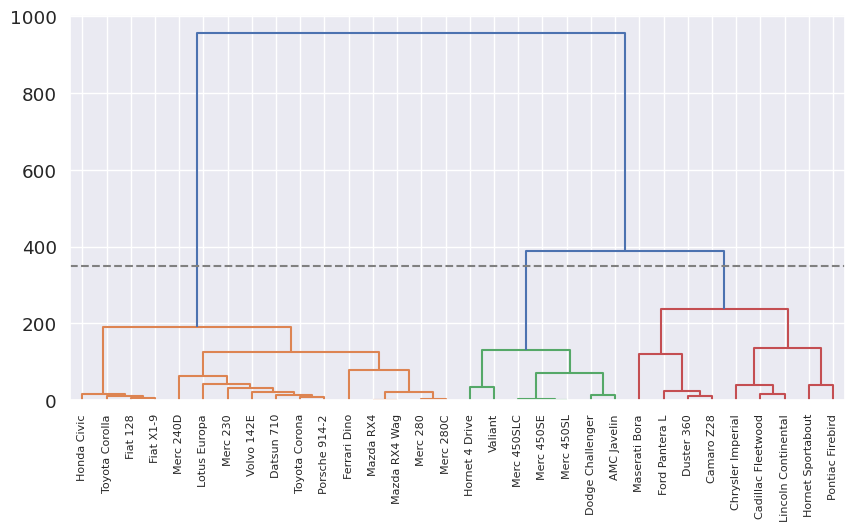

<Figure size 640x480 with 0 Axes>

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

Z = linkage(data, method='ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, labels=data.index, color_threshold=350, leaf_rotation=90)
plt.axhline(y=350, color='gray', linestyle='--')
plt.show()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
dn['color_list'] = ['#69b3a2', '#404080', 'orange']
plt.show()

Heatmap

<Figure size 1000x1000 with 0 Axes>

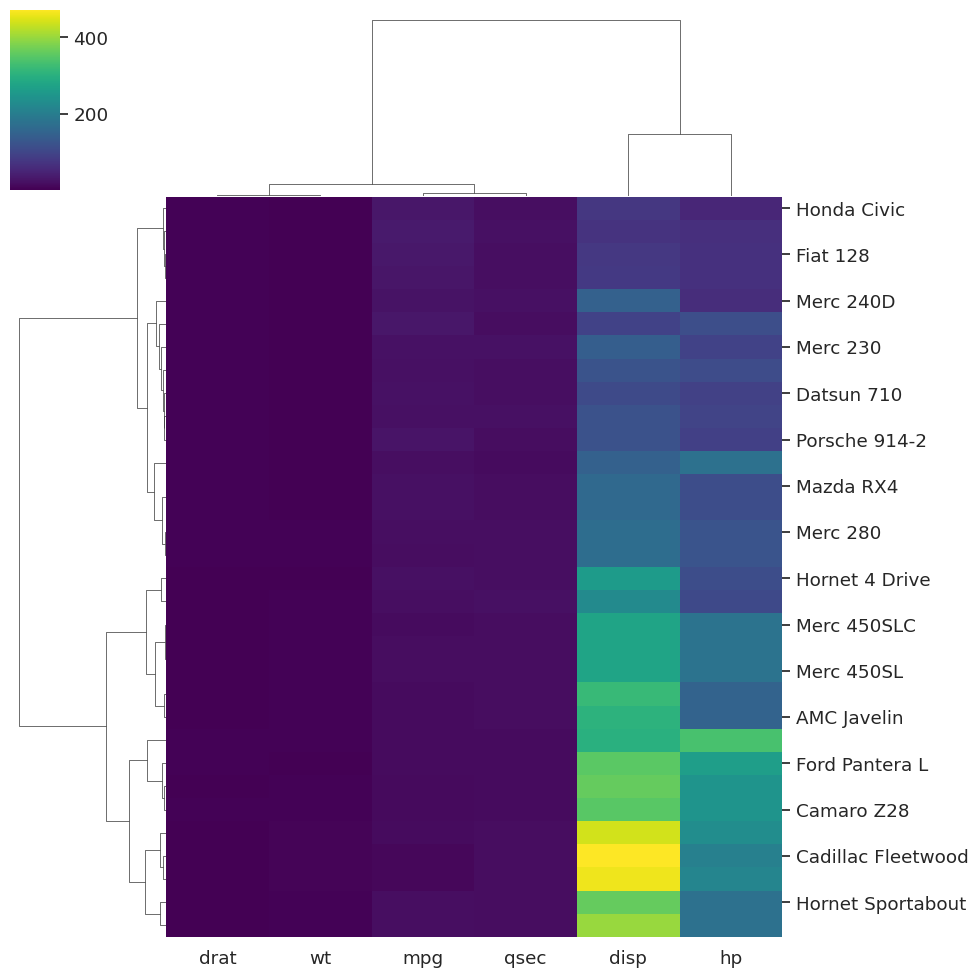

In [13]:

plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.clustermap(data, method="ward", cmap='viridis')
plt.show()

PCA

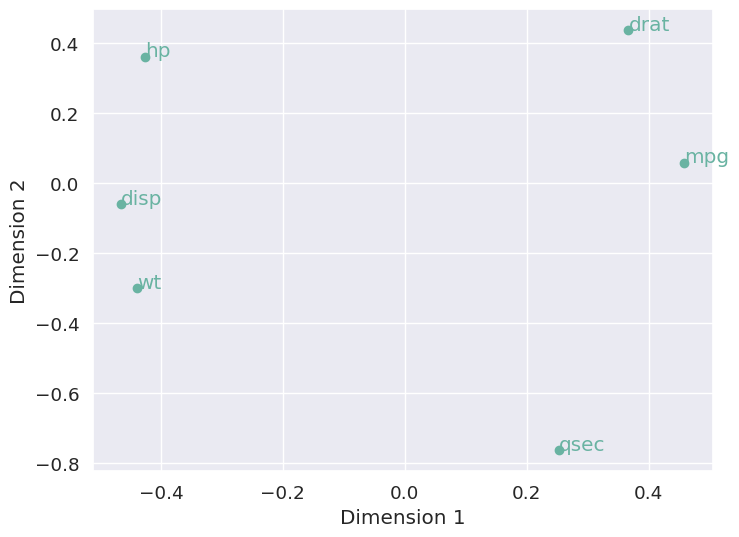

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

myPCA = PCA(n_components=2)

myPCA.fit_transform(data_std)

df = pd.DataFrame(myPCA.components_.T, columns=['coord.Dim.1', 'coord.Dim.2'], index=data.columns)
df['name'] = df.index


plt.figure(figsize=(8, 6))
plt.scatter(df['coord.Dim.1'], df['coord.Dim.2'], color='#69b3a2')
for i, row in df.iterrows():
    plt.annotate(row['name'], (row['coord.Dim.1'], row['coord.Dim.2']), color='#69b3a2')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
plt.show()